c:\Users\Thilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Thilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Thilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Thilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

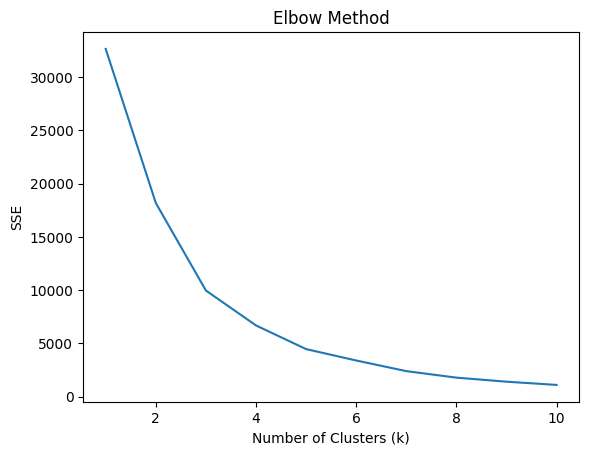

c:\Users\Thilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Thilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


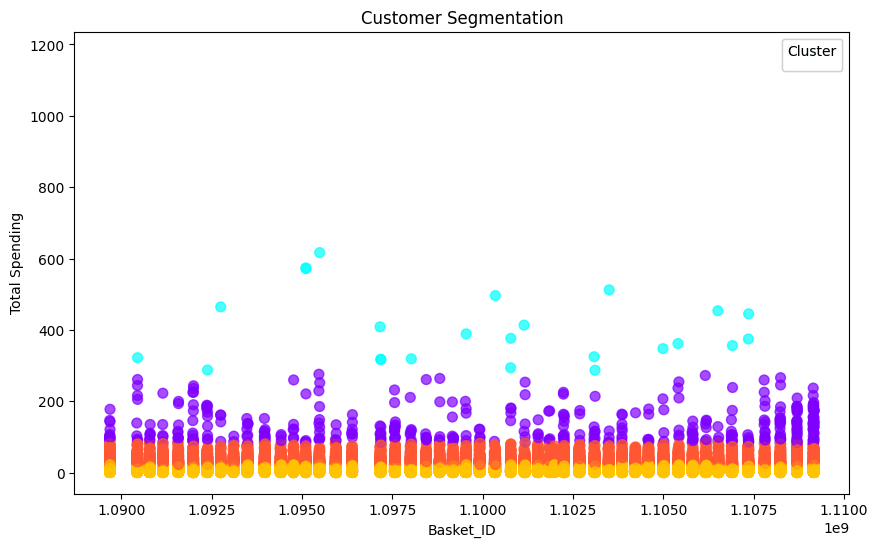

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('merged-data-COMBINED-WOL.csv')

# Convert InvoiceDate to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new feature called "TotalCost" which is the product of "Quantity" and "Price"
df['TotalCost'] = df['Sum_Units'] * df['Sum_Value']

# Calculate the total spending for each customer (InvoiceNo)
customer_spending = df.groupby('Basket_ID')['TotalCost'].sum().reset_index()

# Standardize the spending values using StandardScaler
scaler = StandardScaler()
spending_scaled = scaler.fit_transform(customer_spending[['TotalCost']])

# Find the optimal number of clusters using the Elbow method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(spending_scaled)
    sse[k] = kmeans.inertia_
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.plot(list(sse.keys()), list(sse.values()))
plt.show()

# Fit the K-Means clustering algorithm with the optimal number of clusters (k=4)
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(spending_scaled)
customer_spending['Cluster'] = kmeans.labels_

# Set the color scheme for the clusters
colors = {0: '#FF5733', 1: '#00FFFF', 2: '#FFC300', 3: '#7F00FF'}

# Visualize the customer segments
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(customer_spending['Basket_ID'], customer_spending['TotalCost'], c=customer_spending['Cluster'].map(colors), s=50, alpha=0.7)

# Add legend for the clusters
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)

plt.title('Customer Segmentation')
plt.xlabel('Basket_ID')
plt.ylabel('Total Spending')
plt.show()
